In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#importing libraries
from tqdm import tqdm
import scipy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('tweetsData1.csv', index_col=0)

In [3]:
df

,Tweet Status,Tweet
Date,,
2/17/2021 23:58,"b""","@aichls why aren't you addressing, the death, ..."
2/17/2021 23:58,b',A solidarity protest in front of the Canadian ...
2/17/2021 23:50,b',@bg2030 @SecBlinken @DrSJaishankar BS. Why jou...
2/17/2021 23:47,"b""",@Tractor2twitr\n@Kisanektamorcha\n\n#FarmersPr...
2/17/2021 23:40,b',The government wants farmers to trust in its b...
...,...,...
2/14/2021 14:49,b',@rupikaur_ The Punjab farmers protesting near ...
2/14/2021 14:48,b',@SikhDiplomat @iJasOberoi @mssirsa And yet whe...
2/14/2021 14:46,b',@NANA_PATOLE @narendramodi Why are they protes...


In [4]:
# cleaning text in tweets
def cleanTxt(text):
    # text = re.sub(r'b+', ' ', text)
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    text = re.sub(r'https:\/\/\S+', ' ', text)
    return text

df['Tweet'] = df['Tweet'].apply(cleanTxt)

In [5]:
df

,Tweet Status,Tweet
Date,,
2/17/2021 23:58,"b""","why aren't you addressing, the death, of the..."
2/17/2021 23:58,b',A solidarity protest in front of the Canadian ...
2/17/2021 23:50,b',BS. Why journalist and peaceful girls ge...
2/17/2021 23:47,"b""",\n \n\n#FarmersProtest\n\nIndia's farmers are...
2/17/2021 23:40,b',The government wants farmers to trust in its b...
...,...,...
2/14/2021 14:49,b',_ The Punjab farmers protesting near Delhi In...
2/14/2021 14:48,b',And yet when the genocide took place ......
2/14/2021 14:46,b',_PATOLE Why are they protesting? New farm l...


In [6]:
df['Tweet'] = df['Tweet'].str[2:]

In [7]:
df.head()

,Tweet Status,Tweet
Date,,
2/17/2021 23:58,"b""","why aren't you addressing, the death, of the f..."
2/17/2021 23:58,b',solidarity protest in front of the Canadian pa...
2/17/2021 23:50,b',BS. Why journalist and peaceful girls get ...
2/17/2021 23:47,"b""",n \n\n#FarmersProtest\n\nIndia's farmers are p...
2/17/2021 23:40,b',e government wants farmers to trust in its ben...


In [8]:
from textblob import TextBlob
import matplotlib.pyplot as plt

In [9]:
# defining subjectivity and polarity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

In [10]:
# new table with additional feature 
df.head()

,Tweet Status,Tweet,Subjectivity,Polarity
Date,,,,
2/17/2021 23:58,"b""","why aren't you addressing, the death, of the f...",0.4,-0.20
2/17/2021 23:58,b',solidarity protest in front of the Canadian pa...,0.0,0.00
2/17/2021 23:50,b',BS. Why journalist and peaceful girls get ...,0.5,0.25
2/17/2021 23:47,"b""",n \n\n#FarmersProtest\n\nIndia's farmers are p...,0.0,0.00
2/17/2021 23:40,b',e government wants farmers to trust in its ben...,0.1,0.20


In [11]:
# get positive negative neutral analysis 
def getAnalysis(score):
    if score <=0:
        return '0'
    
    else:
        return '1'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [12]:
df.head()

,Tweet Status,Tweet,Subjectivity,Polarity,Analysis
Date,,,,,
2/17/2021 23:58,"b""","why aren't you addressing, the death, of the f...",0.4,-0.20,0
2/17/2021 23:58,b',solidarity protest in front of the Canadian pa...,0.0,0.00,0
2/17/2021 23:50,b',BS. Why journalist and peaceful girls get ...,0.5,0.25,1
2/17/2021 23:47,"b""",n \n\n#FarmersProtest\n\nIndia's farmers are p...,0.0,0.00,0
2/17/2021 23:40,b',e government wants farmers to trust in its ben...,0.1,0.20,1


In [13]:
df['Tweet'] = df['Tweet'].str.replace("[^a-zA-Z#]", " ") 
df.head(10)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Tweet Status,Tweet,Subjectivity,Polarity,Analysis
Date,,,,,
2/17/2021 23:58,"b""",why aren t you addressing the death of the f...,0.400000,-0.20,0
2/17/2021 23:58,b',solidarity protest in front of the Canadian pa...,0.000000,0.00,0
2/17/2021 23:50,b',BS Why journalist and peaceful girls get ...,0.500000,0.25,1
2/17/2021 23:47,"b""",n n n#FarmersProtest n nIndia s farmers are p...,0.000000,0.00,0
2/17/2021 23:40,b',e government wants farmers to trust in its ben...,0.100000,0.20,1
2/17/2021 23:39,b',What about nirankari farmers why not talk ab...,0.000000,0.00,0
2/17/2021 23:32,b',ease support farmers protesting n#FarmersProt...,0.000000,0.00,0
2/17/2021 23:27,b',sINGLa You will die without food Are you r...,0.666667,-0.50,0
2/17/2021 23:22,b',y are farmers protesting in India xe x x ...,0.000000,0.00,0


In [14]:
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,Tweet Status,Tweet,Subjectivity,Polarity,Analysis
Date,,,,,
2/17/2021 23:58,"b""",aren addressing death farmers protesting plus ...,0.4,-0.20,0
2/17/2021 23:58,b',solidarity protest front Canadian parliament h...,0.0,0.00,0
2/17/2021 23:50,b',journalist peaceful girls abducted molested Po...,0.5,0.25,1
2/17/2021 23:47,"b""",n#FarmersProtest nIndia farmers protesting aut...,0.0,0.00,0
2/17/2021 23:40,b',government wants farmers trust benevolence whe...,0.1,0.20,1


In [15]:
tokenized_tweet = df['Tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

Date
2/17/2021 23:58    [aren, addressing, death, farmers, protesting,...
2/17/2021 23:58    [solidarity, protest, front, Canadian, parliam...
2/17/2021 23:50    [journalist, peaceful, girls, abducted, molest...
2/17/2021 23:47    [n#FarmersProtest, nIndia, farmers, protesting...
2/17/2021 23:40    [government, wants, farmers, trust, benevolenc...
Name: Tweet, dtype: object

In [16]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
df.head()

,Tweet Status,Tweet,Subjectivity,Polarity,Analysis
Date,,,,,
2/17/2021 23:58,"b""",aren addressing death farmers protesting plus ...,0.4,-0.20,0
2/17/2021 23:58,b',solidarity protest front Canadian parliament h...,0.0,0.00,0
2/17/2021 23:50,b',journalist peaceful girls abducted molested Po...,0.5,0.25,1
2/17/2021 23:47,"b""",n#FarmersProtest nIndia farmers protesting aut...,0.0,0.00,0
2/17/2021 23:40,b',government wants farmers trust benevolence whe...,0.1,0.20,1


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [19]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(df['Tweet']) 
bow.shape

(2500, 1000)

### Data Visualization

Word cloud

In [20]:
import sys
print(sys.executable)

D:\Anaconda\python.exe


In [21]:
from wordcloud import WordCloud

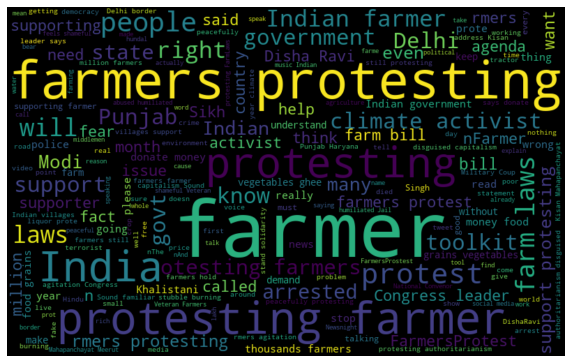

In [22]:
all_words = ' '.join([text for text in df['Tweet']]) 


wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [23]:
#Collecting hashtag 
def hashtag_extract(x):    
    hashtags = []    
    # Looping over the words in tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [24]:
# extracting hashtags 
HashtagR = hashtag_extract(df['Tweet'])

HashtagR = sum(HashtagR,[]) 

In [25]:
import nltk
import seaborn as sns

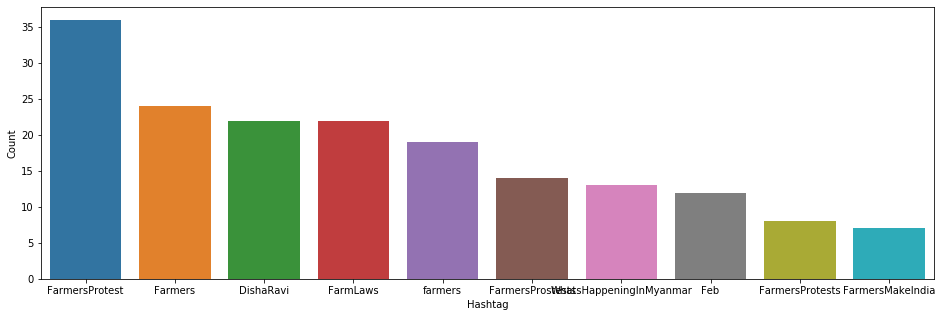

In [26]:
a = nltk.FreqDist(HashtagR) 
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 

# Picking top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10)

plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

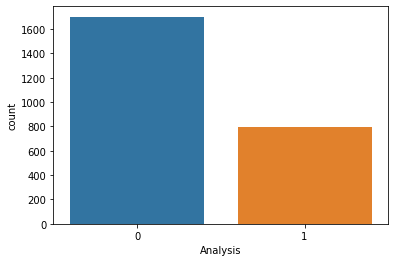

In [27]:
sns.countplot(x='Analysis',data=df)
plt.show()

### TF-IDF Features
TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

TF-IDF = TF*IDF

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(df['Tweet']) 
tfidf.shape

(2500, 1000)

### Word2Vec Features
Word2Vec Embedding

In [29]:
tokenized_tweet = df['Tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(df['Tweet']), epochs=20)

(319256, 475560)

In [30]:
model_w2v.wv.most_similar(positive="farmers")

[('protestin', 0.6374704837799072),
 ('side', 0.6349412798881531),
 ('left', 0.6312360763549805),
 ('stil', 0.6249129176139832),
 ('nWhy', 0.6207587122917175),
 ('wealthy', 0.6153717041015625),
 ('Learn', 0.6123462915420532),
 ('almost', 0.6113221645355225),
 ('shown', 0.6103034019470215),
 ('individuals', 0.6087589859962463)]

### Prepare vectors for tweet

In [31]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [32]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 

wordvec_df.shape

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(2500, 200)

### Doc2Vec Embedding

In [33]:
from gensim.models.doc2vec import LabeledSentence

In [34]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


In [35]:
labeled_tweets[:6]

[LabeledSentence(words=['aren', 'addressing', 'death', 'farmers', 'protesting', 'plus', 'dead'], tags=['tweet_2/17/2021 23:58']),
 LabeledSentence(words=['solidarity', 'protest', 'front', 'Canadian', 'parliament', 'held', 'India', 'farmers', 'today', 'nAcross', 'country'], tags=['tweet_2/17/2021 23:58']),
 LabeledSentence(words=['journalist', 'peaceful', 'girls', 'abducted', 'molested', 'Police', 'Custod'], tags=['tweet_2/17/2021 23:50']),
 LabeledSentence(words=['n#FarmersProtest', 'nIndia', 'farmers', 'protesting', 'authoritarianism', 'disguised', 'capi'], tags=['tweet_2/17/2021 23:47']),
 LabeledSentence(words=['government', 'wants', 'farmers', 'trust', 'benevolence', 'when', 'designs', 'laws', 'without', 'their', 'input', 'supposedly'], tags=['tweet_2/17/2021 23:40']),
 LabeledSentence(words=['What', 'about', 'nirankari', 'farmers', 'talk', 'about', 'farmers', 'protesting', 'fighting', 'thier'], tags=['tweet_2/17/2021 23:39'])]

### train the data

In [36]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
                                  vector_size=200, # no. of desired features                                  
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used                                 
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=3, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23)
model_d2v.build_vocab([i for i in labeled_tweets])
model_d2v.train(labeled_tweets, total_examples= len(tokenized_tweet), epochs=15)

In [37]:
tokenized_tweet

Date
2/17/2021 23:58    [aren, addressing, death, farmers, protesting,...
2/17/2021 23:58    [solidarity, protest, front, Canadian, parliam...
2/17/2021 23:50    [journalist, peaceful, girls, abducted, molest...
2/17/2021 23:47    [n#FarmersProtest, nIndia, farmers, protesting...
2/17/2021 23:40    [government, wants, farmers, trust, benevolenc...
                                         ...                        
2/14/2021 14:49    [Punjab, farmers, protesting, near, Delhi, Ind...
2/14/2021 14:48    [when, genocide, took, place, referred, pandit...
2/14/2021 14:46    [PATOLE, they, protesting, farm, laws, good, f...
2/14/2021 14:45    [protesting, injustices, keep, covid, safety, ...
2/14/2021 14:45                [shivangi, sure, Have, gone, through]
Name: Tweet, Length: 2500, dtype: object

In [38]:
df.head()
df['Analysis']

Date
2/17/2021 23:58    0
2/17/2021 23:58    0
2/17/2021 23:50    1
2/17/2021 23:47    0
2/17/2021 23:40    1
                  ..
2/14/2021 14:49    1
2/14/2021 14:48    0
2/14/2021 14:46    1
2/14/2021 14:45    0
2/14/2021 14:45    1
Name: Analysis, Length: 2500, dtype: object

In [39]:
df['Analysis'].value_counts()

0    1702
1     798
Name: Analysis, dtype: int64

In [40]:
y_value_counts=df['Analysis'].value_counts()
print("Positive tweets  = ",y_value_counts[1], "with percentage ", (y_value_counts[1]*100)/(y_value_counts[0]+y_value_counts[1]),'%')
print("Negative tweets  = ",y_value_counts[0], "with percentage ", (y_value_counts[0]*100)/(y_value_counts[0]+y_value_counts[1]),'%')

Positive tweets  =  798 with percentage  31.92 %
Negative tweets  =  1702 with percentage  68.08 %


In [41]:
y=df['Analysis']
x=df.drop(['Analysis'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=40)

### Tfid

In [42]:
vect=TfidfVectorizer(min_df=10)

vect.fit(x_train['Tweet'].values)

train_tweet=vect.transform(x_train['Tweet'].values)
test_tweet=vect.transform(x_test['Tweet'].values)

print(train_tweet.shape,y_train.shape)
print(test_tweet.shape,y_test.shape)

(2000, 291) (2000,)
(500, 291) (500,)


In [43]:
import nltk

In [44]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\smitt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
#calculating sentiment scores for train data
x_train_sent=np.ndarray.tolist(x_train["Tweet"].values)

sia=SentimentIntensityAnalyzer()
ps=[]
for i in range(len(x_train_sent)):
    ps.append((sia.polarity_scores((x_train_sent[i]))))
    
x_train_polarity=np.array(ps)
x_train_polarity=x_train_polarity.reshape(-1,1)
x_train_polarity.shape

(2000, 1)

In [47]:
#storing only scores of sentiment
x_t=[]
for i in range(len(x_train)):
    for j in x_train_polarity[0][0]:
        x_t.append(x_train_polarity[i][0][j])
x_t=np.array(x_t)
x_t=x_t.reshape(-1,4)
x_t.shape

(2000, 4)

In [48]:
#calculating sentiment scores for test data
x_test_sent=np.ndarray.tolist(x_test["Tweet"].values)

sia=SentimentIntensityAnalyzer()
ps=[]
for i in range(len(x_test_sent)):
    ps.append((sia.polarity_scores((x_test_sent[i]))))
    
x_test_polarity=np.array(ps)
x_test_polarity=x_test_polarity.reshape(-1,1)
x_test_polarity.shape

(500, 1)

In [49]:
#storing only scores of sentiment
x_tests=[]
for i in range(len(x_test)):
    for j in x_test_polarity[0][0]:
        x_tests.append(x_test_polarity[i][0][j])
x_tests=np.array(x_tests)
x_tests=x_tests.reshape(-1,4)
x_tests.shape

(500, 4)

Convert the vectors into scipy.sparse matrix

In [50]:
from scipy.sparse import hstack

In [51]:
x_tr=hstack((train_tweet,x_t))
x_te=hstack((test_tweet,x_tests))

print(x_tr.shape)
print(x_te.shape)

(2000, 295)
(500, 295)


Data is ready

### Navie bayes

In [52]:
vec=CountVectorizer(min_df=10)
vec.fit(x_train['Tweet'].values)

x_tr_count=vec.transform(x_train['Tweet'].values)
x_te_count=vec.transform(x_test['Tweet'].values)
x_tr_count.shape

(2000, 291)

In [53]:
x_tr_data=hstack((x_tr_count,x_t))
x_te_data=hstack((x_te_count,x_tests))

x_trn=scipy.sparse.csr_matrix(x_tr_count)
x_tst=scipy.sparse.csr_matrix(x_te_count)

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
mod = MultinomialNB()
mod.fit(x_trn,y_train)

MultinomialNB()

In [56]:
train_pred=mod.predict(x_trn)
test_pred=mod.predict(x_tst)

In [57]:
#get the summary of this model

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       340
           1       0.84      0.53      0.65       160

    accuracy                           0.82       500
   macro avg       0.82      0.74      0.76       500
weighted avg       0.82      0.82      0.80       500



### XGBoost

In [58]:
from xgboost import XGBClassifier

In [59]:
xg=XGBClassifier()
param=dict(max_depth=[4,6,8,10],n_estimators=[100,500,1000,1500])
search=RandomizedSearchCV(xg,param,random_state=10)
srch=search.fit(x_tr,y_train)
srch.cv_results_

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'mean_fit_time': array([2.83000784, 6.78573995, 6.35311522, 8.24745994, 5.30675783,
        0.84983778, 5.93608384, 3.9720058 , 7.95358071, 0.9341444 ]),
 'std_fit_time': array([0.09987248, 0.75895194, 0.40317981, 0.86459808, 0.3165042 ,
        0.02752918, 0.19642713, 0.10975873, 0.20990001, 0.02098381]),
 'mean_score_time': array([0.02411189, 0.02766352, 0.03167434, 0.03193817, 0.02783933,
        0.01154494, 0.03057489, 0.02235751, 0.03022571, 0.01302485]),
 'std_score_time': array([0.00562679, 0.00458228, 0.00310426, 0.00903136, 0.00444736,
        0.00216553, 0.00221633, 0.00331796, 0.00334918, 0.00269655]),
 'param_n_estimators': masked_array(data=[500, 1500, 1000, 1500, 1000, 100, 1000, 1000, 1500,
                    100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[6, 4, 10, 6, 6, 8, 8, 4, 8, 10],
              mask=[Fal

In [60]:
srch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None, average=None).fit(x_tr, y_train)

prediction = xgb.predict(x_te) 

f1_score(y_test, prediction, average=None)

[10:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.84495021, 0.63299663])

In [62]:
train_prediction=xgb.predict(x_tr)

In [63]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       340
           1       0.69      0.59      0.63       160

    accuracy                           0.78       500
   macro avg       0.75      0.73      0.74       500
weighted avg       0.78      0.78      0.78       500



### Support Vector MAchine

In [80]:
from sklearn.svm import SVC

In [66]:
sv=SVC()

In [67]:
sv.fit(x_tr,y_train)

SVC()

In [81]:
test_prediction=sv.predict(x_te)

In [82]:
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       340
           1       0.85      0.51      0.64       160

    accuracy                           0.82       500
   macro avg       0.83      0.74      0.76       500
weighted avg       0.82      0.82      0.80       500



### Logistic linear regression

In [72]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score,accuracy_score

In [73]:
import sklearn
from sklearn import linear_model

In [74]:
model=linear_model.LogisticRegression()


In [75]:
model.fit(x_tr,y_train)
test_prediction=model.predict(x_te)


In [76]:
accuracy=accuracy_score(y_test,test_prediction)
#test_pred=model.predict(xtest)

In [77]:
accuracy

0.804

In [78]:
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       340
           1       0.81      0.51      0.62       160

    accuracy                           0.80       500
   macro avg       0.81      0.73      0.75       500
weighted avg       0.80      0.80      0.79       500



### Results

| Model     | F1- Score| 
| :---        |    :----:  | 
| Navie Bayes      | 0.82   |   
| XGBoost  | 0.78    | 
| SVM  | 0.82   | 
| Logistic Regression  | 0.80   | 

As for sentiment analysis for Twitter Farmers Protest speech **Navie Bayes** and **SVM** model is best fit